# SARSA and Q-Learning: Cliffworld Example

In this exercise we use the cliffworld example to implement SARSA and Q-Learning,
and to illustrate how their behavior differs.

For a detailed description of the setting see
[Example 6.6 in *Sutton & Barto*](http://incompleteideas.net/book/RLbook2020trimmed.pdf#page=154).

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gridworld import GridWorld 
from collections import defaultdict

# Use `tk` for interactive play, `inline` for normal plots:
# %matplotlib tk
%matplotlib inline

First, we recreate the setting from the example using our generic gridworld class.

*(How this is done is somewhat specific to our implementation and the details do not matter too much.)*

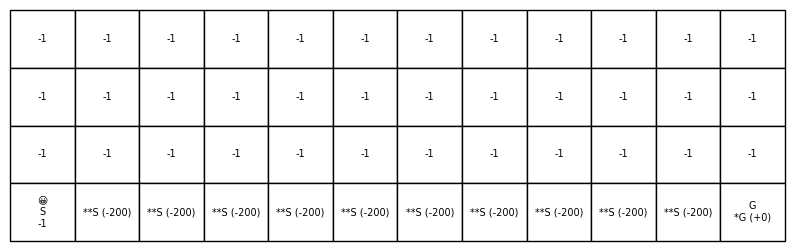

In [2]:
# Dimension and start/goal squares
HEIGHT = 4
WIDTH = 12
START = (HEIGHT - 1, 0)
GOAL = (HEIGHT - 1, WIDTH - 1)

# Create (empty) gridworld instance
gw = GridWorld(HEIGHT, WIDTH, START)

# Label start/goal
gw.positionLabels[START] = 'S'
gw.positionLabels[GOAL] = 'G'

# Add cliffs to the bottom row (except for corners)
for i in range(1, WIDTH - 1):
    gw.immediateTeleportations[(HEIGHT - 1, i)] = (START, -200)

# Make goal state terminal
gw.teleportations[GOAL] = (GOAL, 0)

# Give -1 reward for all other transitions
gw.rewards[START] = -1
gw.invalidActionReward = -1
for i in range(HEIGHT - 1):
    for j in range(WIDTH):
        gw.rewards[(i, j)] = -1

# A small chance of doing something random, just to make a point
gw.randomChance = 0.0

# Helper list, containing all possible states and actions
ALL_STATES = list((i, j) for i in range(gw.height) for j in range(gw.width))
ACTIONS = [0, 1, 2, 3]

# Plot the world
plt.figure(figsize=(10,3))
gw.drawWorld()
plt.show()

# # Play in the world
# gw.play()

Define some parameters used below.

In [3]:
# Learning rate
ALPHA = 0.1

# Exploration rate
EPSILON = 0.1

# Discount factor
GAMMA = 1.0

# Number of episodes in SARSA/Q-learning
N_EPISODES = 10000


## SARSA

In this section we implement SARSA to solve the cliff world environment.

We start by implementing a helper function that lets us choose an action in an epsilon-greedy manner, according to our current estimate of the state-action values $q(s,a)$.

In [ ]:
def chooseEpsilonGreedy(allQValues, state, eps):
    # Choose random action with probability `eps`
    # ...
    
    # Chose optimal action (breaking ties randomly)
    # ...
    pass


Next, we implement SARSA itself, following the pseudocode in *Sutton & Barto*, page 130.

In [ ]:
# Initialize Q(s,a) arbitrarily
# Repeat (for each episode):
#     Initialize s
#     Choose a from s using policy derived from Q (e.g., epsilon-greedy)
#     Repeat (for each step of episode):
#         Take action a, observe r, s'
#         Choose a' from s' using policy derived from Q (e.g., epsilon-greedy)
#         Q(s,a) <- Q(s,a) + alpha * [r + gamma * Q(s',a') - Q(s,a)]
#         s <- s'; a <- a';
#     until s is terminal


In [ ]:
def sarsaEpisode(world: GridWorld, qValues):
    # ...
    pass

In [ ]:
# Initialize Q(s,a) arbitrarily
# ...

# Repeat (for each episode):
# ...

Lastly, we illustrate the result of SARSA by looking at the paths taken during training, the estimated value function, and the corresponding optimal policy.

In [ ]:
# Plot paths taken at various stages
plt.figure(figsize=(12, 3))
ax = plt.subplot(1, 3, 1)
# ...
ax = plt.subplot(1, 3, 2)
# ...
ax = plt.subplot(1, 3, 3)
# ...
plt.show()

In [ ]:
# Plot the optimal policy and state values
policy = dict()
values = dict()

# Compute policy/value for each state
# ...

# Plot policy
plt.figure(figsize=(10,3))
gw.drawWorld(drawRewards=False, policy=policy)
plt.show()

# Plot values
plt.figure(figsize=(10,3))
gw.drawWorld(drawRewards=False, values=values)
plt.show()


In [ ]:
# A more basic way to plot the policy
labels = ['U', 'R', 'D', 'L']
for i in range(gw.height):
    for j in range(gw.width):
        # ...
        pass

In [ ]:
# Helper function to play and plot a greedy game (w.r.t. the supplied Q-values)
def illustrateGreedyGame(world: GridWorld, qValues):
    world.reset()
    states = [world.pos]
    action = chooseEpsilonGreedy(qValues, world.pos, 0.0)
    actions = [action]
    rewards = [0]
    while world.pos != GOAL:
        newPos, reward = world.step(action)
        action = chooseEpsilonGreedy(qValues, world.pos, 0.0)
        rewards.append(reward)
        states.append(world.pos)
        actions.append(action)
    plt.figure(figsize=(10,3))
    gw.drawWorld(drawRewards=False, path=states)
    plt.show()
    print('Total reward:', sum(rewards))


In [ ]:
# illustrateGreedyGame(gw, sarsaQValues)

In [ ]:
# Count how often each state was visited
sarsaHitCounts = defaultdict(lambda: 0)
# ...

# Plot hit counts
plt.figure(figsize=(12, 3))
# ...
plt.show()

## Q-Learning

In this section we implement Q-learning to solve the cliff world environment, 
following the pseudocode in *Sutton & Barto*, page 131.

In [ ]:
# Initialize Q(s,a) arbitrarily
# Repeat (for each episode):
#     Initialize s
#     Repeat (for each step of episode):
#         Choose a from s using policy derived from Q (e.g., epsilon-greedy)
#         Take action a, observe r, s'
#         Q(s,a) <- Q(s,a) + alpha * [r + gamma * max_a' Q(s',a') - Q(s,a)]
#         s <- s';
#     until s is terminal


In [ ]:
def qLearningEpisode(world: GridWorld, qValues):
    # ...
    pass

In [ ]:
# Initialize Q(s,a) arbitrarily
# ...

# Repeat (for each episode):
# ...

We illustrate the results of Q-learning similarly to the results of SARSA.

In [ ]:
# Plot paths taken at various stages
plt.figure(figsize=(12,3))
ax = plt.subplot(1, 3, 1)
# ...
ax = plt.subplot(1, 3, 2)
# ...
ax = plt.subplot(1, 3, 3)
# ...
plt.show()

In [ ]:
# Plot the optimal policy and state values
policy = dict()
values = dict()

# Plot the optimal policy and state values
# ...

# Plot policy
plt.figure(figsize=(10,3))
gw.drawWorld(drawRewards=False, policy=policy)
plt.show()

# Plot values
plt.figure(figsize=(10,3))
gw.drawWorld(drawRewards=False, values=values)
plt.show()


In [ ]:
labels = ['U', 'R', 'D', 'L']
for i in range(gw.height):
    for j in range(gw.width):
        # ...
        pass

In [ ]:
# # Use the illustrate function from above
# illustrateGreedyGame(gw, qLearningQValues)

In [ ]:
# Count how often each state was visited
qLearningHitCounts = defaultdict(lambda: 0)
# ...

# Plot hit counts
plt.figure(figsize=(12, 3))
# ...
plt.show()

## Comparison of per-episode rewards

Below we compare the per-episode rewards of SARSA and Q-learning.
Plotting a moving average might be more insightful than raw rewards.

In [ ]:
# Helper function to compute a moving average
def movingAverage(a, k):
    return np.convolve(a, np.ones(k), 'valid') / k

# Plot (moving average) of per-episode rewards
N_AVERAGE = 100
plt.figure()
# ...
plt.show()

# Compute average over the second half of episodes
print('Long-term average rewards\n---')
# ...